In [2]:
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

In [3]:
def loadData():
    cases = pd.read_csv('http://www.dkriesel.com/_media/corona-cases.csv', sep='\t')
    recoveries = pd.read_csv('http://www.dkriesel.com/_media/corona-recoveries.csv',sep='\t')
    deaths = pd.read_csv('http://www.dkriesel.com/_media/corona-deaths.csv', sep='\t')
    return cases, recoveries, deaths

In [4]:
def wrangleData(country, month, cases, recoveries, deaths):    
    uae_d = deaths[['Date', country]]
    uae_c = cases[['Date', country]]
    uae_r = recoveries[['Date', country]]
    uae_d.columns = ['Date_d', 'deaths']
    uae_c.columns = ['Date_c', 'cases']
    uae_r.columns = ['Date_r', 'recoveries']
    data = [uae_c, uae_d, uae_r]
    df = pd.concat(data, axis=1)
    df.drop(['Date_d', 'Date_r'], axis=1, inplace=True)   
    df.rename(columns={'Date_c': 'date'})          
    df['Date_c'] = pd.to_datetime(df['Date_c'], format='%Y-%m-%d %H:%M:%S.%f')
    df.set_index('Date_c', inplace=True)    
    df = df.loc[datetime.date(year=2020,month=month,day=1):]
    df['active'] = df['cases'] - (df['deaths'] + df['recoveries'])
    df['change_active'] = df['active'].pct_change()
    df['change_active'] = df['change_active'] * 100
    df['change_cases'] = df['cases'].pct_change()
    df['change_cases'] = df['change_cases'] * 100    
    df[df['change_cases'] == np.inf] = np.nan

    fig, ax = plt.subplots(figsize=(13,8))
    plt.xticks(rotation=70)
    ax.plot(df['change_active'], label='Change active cases', color='darkblue', linewidth=1)
    ax.plot(df['change_cases'], label='Change total cases', color='orange', linewidth=0.5)
    #     ax.set_xlim([datetime.date(2020, 4, 1), datetime.date(2020, 4, 28)])
    bottom = np.nanmin(df['change_active']) - 5
    top = np.nanmax(df['change_active']) + 5
    ax.set_ylim(bottom=bottom,top=top)
    ax.set_title(f'Daily change in active cases of COVID-19 ({country})', fontsize=14)
    ax.legend()
    ax.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.axhline(0, color='black', lw=1)
    plt.show()

In [4]:
cases, recoveries, deaths = loadData()
print(f"Data downloaded succesfully at {datetime.datetime.now()} o'clock")

Data downloaded succesfully at 2020-07-03 07:33:18.282785 o'clock


In [5]:
interact(wrangleData, country=['Germany','United Arab Emirates', 'Sweden', 'Netherlands', 'Japan', 'Denmark', 'Brazil', 'Spain', 'Korea, South', 'Taiwan*'], month=[6,5,4,3,2,1], cases=fixed(cases), recoveries=fixed(recoveries), deaths=fixed(deaths))

interactive(children=(Dropdown(description='country', options=('Germany', 'United Arab Emirates', 'Sweden', 'N…

<function __main__.wrangleData(country, month, cases, recoveries, deaths)>

In [6]:
cases.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [7]:
uae_d = deaths[['Date', 'United Arab Emirates']]
uae_c = cases[['Date', 'United Arab Emirates']]
uae_r = recoveries[['Date', 'United Arab Emirates']]
uae_d.columns = ['Date_d', 'deaths']
uae_c.columns = ['Date_c', 'cases']
uae_r.columns = ['Date_r', 'recoveries']
data = [uae_c, uae_d, uae_r]
df = pd.concat(data, axis=1)
df.drop(['Date_d', 'Date_r'], axis=1, inplace=True)   
df.rename(columns={'Date_c': 'date'})          
df['Date_c'] = pd.to_datetime(df['Date_c'], format='%Y-%m-%d %H:%M:%S.%f')
df.set_index('Date_c', inplace=True)    
df = df.loc[datetime.date(year=2020,month=1,day=1):]
df['active'] = df['cases'] - (df['deaths'] + df['recoveries'])
df['change_active'] = df['active'].pct_change()
df['change_active'] = df['change_active'] * 100
df['change_cases'] = df['cases'].pct_change()
df['change_cases'] = df['change_cases'] * 100    
df[df['change_cases'] == np.inf] = np.nan

In [8]:
df.tail()

,cases,deaths,recoveries,active,change_active,change_cases
Date_c,,,,,,
2020-06-27,47360.0,311.0,35834.0,11215.0,0.187601,0.823878
2020-06-28,47797.0,313.0,36411.0,11073.0,-1.266161,0.922720
2020-06-29,48246.0,314.0,37076.0,10856.0,-1.959722,0.939390
2020-06-30,48667.0,315.0,37566.0,10786.0,-0.644805,0.872611
2020-07-01,49069.0,316.0,38160.0,10593.0,-1.789357,0.826022


(array([737456., 737485., 737516., 737546., 737577., 737607.]),
 <a list of 6 Text major ticklabel objects>)

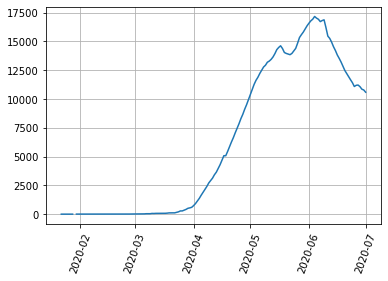

In [9]:
plt.plot(df['active'])
# plt.yscale('log')
plt.grid()
plt.xticks(rotation=70)

In [6]:
cases, recoveries, deaths = loadData()

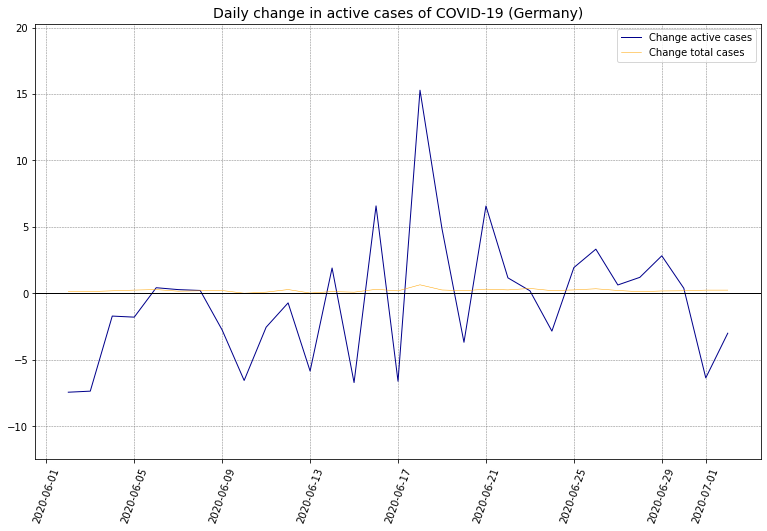

In [7]:
wrangleData(country='Germany', month=6, cases=cases, recoveries=recoveries, deaths=deaths)

In [8]:
cases.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
